<a href="https://colab.research.google.com/github/Blandy24/FUTURE_DS_01/blob/main/NETWORK_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import sys
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [9]:
ZKC_graph = nx.karate_club_graph()

Mr_Hi = 0
John_A = 33

club_labels = nx.get_node_attributes(ZKC_graph, 'club')

print({key: club_labels[key] for key in range(10, 16)})


{10: 'Mr. Hi', 11: 'Mr. Hi', 12: 'Mr. Hi', 13: 'Mr. Hi', 14: 'Officer', 15: 'Officer'}


In [11]:
A = nx.to_numpy_array(ZKC_graph)
A

array([[0., 4., 5., ..., 2., 0., 0.],
       [4., 0., 6., ..., 0., 0., 0.],
       [5., 6., 0., ..., 0., 2., 0.],
       ...,
       [2., 0., 0., ..., 0., 4., 4.],
       [0., 0., 2., ..., 4., 0., 5.],
       [0., 0., 0., ..., 4., 5., 0.]])

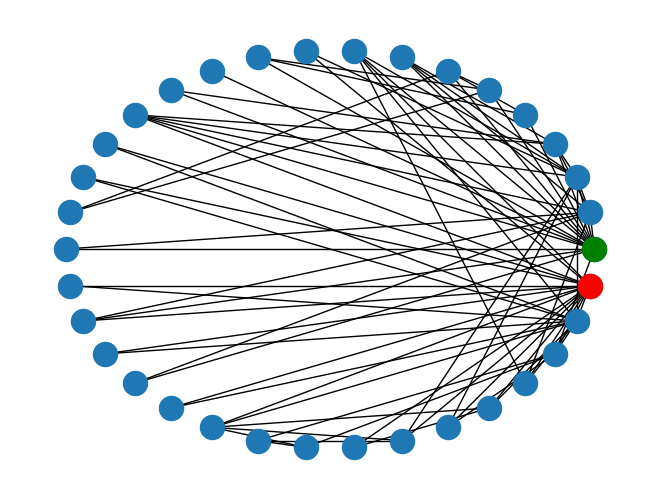

In [12]:
circ_pos = nx.circular_layout(ZKC_graph)

nx.draw(ZKC_graph, circ_pos)

nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=[Mr_Hi], node_color='g', alpha=1)
nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=[John_A], node_color='r', alpha=1)


In [14]:
density = nx.density(ZKC_graph)
print(f'The edge density is: {density}')

The edge density is: 0.13903743315508021


In [15]:
degree = ZKC_graph.degree()
degree_list = []

for (n, d) in degree:
    degree_list.append(d)

av_degree = sum(degree_list) / len(degree_list)
print(f'The average degree is {av_degree}')

The average degree is 4.588235294117647


Text(0.5, 1.0, 'Karate Club: Node Degree')

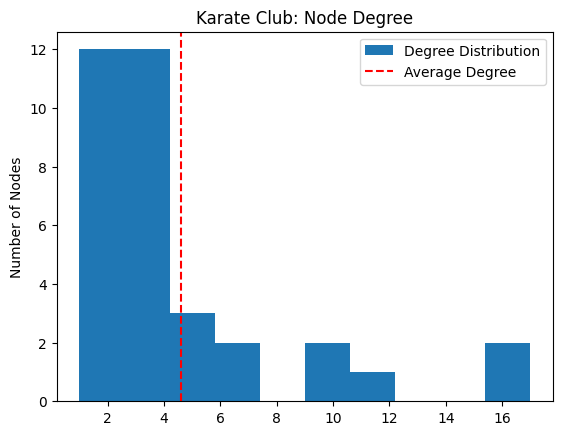

In [16]:
plt.hist(degree_list, label='Degree Distribution')
plt.axvline(av_degree, color='r', linestyle='dashed', label='Average Degree')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Karate Club: Node Degree')

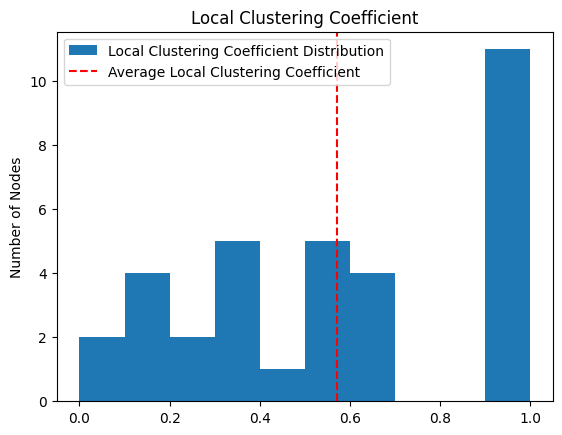

In [19]:
local_clustering_coefficient = nx.algorithms.cluster.clustering(ZKC_graph)

av_local_clustering_coefficient = sum(local_clustering_coefficient.values()) / len(local_clustering_coefficient)

plt.hist(local_clustering_coefficient.values(), label='Local Clustering Coefficient Distribution')
plt.axvline(av_local_clustering_coefficient, color='r', linestyle='dashed', label='Average Local Clustering Coefficient')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Local Clustering Coefficient')
plt.show()

In [20]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

c = list(greedy_modularity_communities(ZKC_graph))

print(len(c))

3


In [21]:
community_0 = sorted(c[0])
community_1 = sorted(c[1])
community_2 = sorted(c[2])

print(community_0)
print(community_1)
print(community_2)

[8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
[1, 2, 3, 7, 9, 12, 13, 17, 21]
[0, 4, 5, 6, 10, 11, 16, 19]


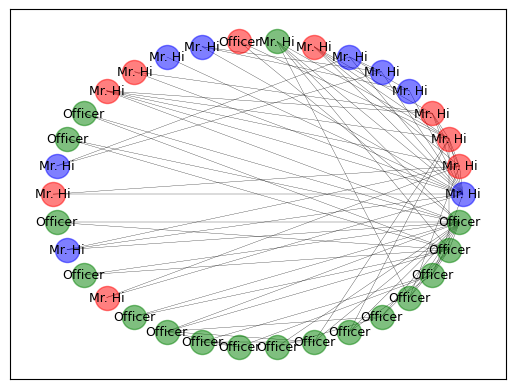

In [22]:
nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=community_0, node_color='g', alpha=0.5)
nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=community_1, node_color='r', alpha=0.5)
nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=community_2, node_color='b', alpha=0.5)

nx.draw_networkx_edges(ZKC_graph, circ_pos, width=0.2)

nx.draw_networkx_labels(ZKC_graph, circ_pos, club_labels, font_size=9)

plt.show()

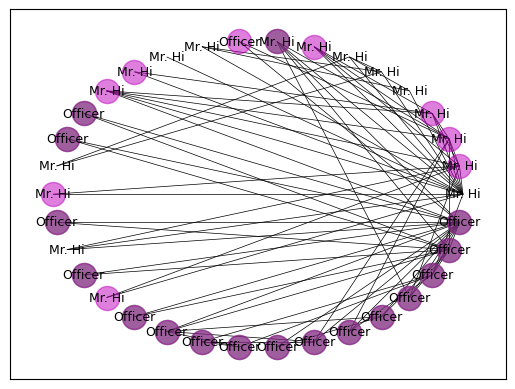

In [26]:
nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=community_0, node_color='g', alpha=0.5)
nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=combined_community, node_color='m', alpha=0.5)

nx.draw_networkx_edges(ZKC_graph, circ_pos,width = 0.5)

nx.draw_networkx_labels(ZKC_graph, circ_pos, club_labels, font_size=9)

plt.show()